## XAFS Data Processing

Here we'll use Larch for XAFS data processing:

  1. read data from an Athena Project File
  2. do XAFS background subtraction with autobk()
  3. do XAFS Fourier transform with xfft()
  
For more details, see https://xraypy.github.io/xraylarch/xafs/

We'll start with reading and exploring the Athena Project File:

In [1]:
from larch.io import read_athena
project = read_athena('../xafsdata/fe_athena.prj')

In [2]:
for name, group in project._athena_groups.items():
    print(name, group)

fe2o3_rt1_xmu <Group 0x7f6e246f0050>
fe3c_rt_xdi <Group 0x7f6e246f0550>
feo_rt1_xmu <Group 0x7f6e246f0790>


> **NOTE** For additional features of working with Athena project files -> [IO_Athena_project.ipynb](./IO_Athena_project.ipynb) 

Let's get that data group for Fe2O3 and look at what that Group object contains

In [6]:
fe2o3 = project.fe2o3_rt1_xmu
for attr in dir(fe2o3):
    print(attr, type(getattr(fe2o3, attr)))

athena_id <class 'str'>
athena_params <class 'larch.symboltable.Group'>
bkg_params <class 'larch.symboltable.Group'>
energy <class 'numpy.ndarray'>
epsk <class 'float'>
epsr <class 'float'>
fft_params <class 'larch.symboltable.Group'>
i0 <class 'numpy.ndarray'>
importance <class 'float'>
label <class 'str'>
mu <class 'numpy.ndarray'>
provenance <class 'str'>
signal <class 'numpy.ndarray'>


There are several components to this Group of data.  We note that there are arrays for `energy` and `mu`.   These are what represent $\mu(E)$.

----------

We'll want to plot this data and the other data arrays as we go. The standard scientific-python-Jupyter approach would be to use inline maplotlib:

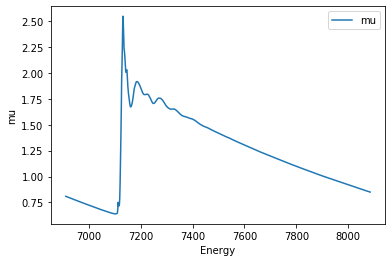

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fe2o3.energy, fe2o3.mu, label='mu')
plt.xlabel('Energy')
plt.ylabel('mu')
plt.legend()

As an aside, we could also use the wxmplot plotting tools that were developed for Larch to make equivalent plots.
Instead of being a static plot in-line, this will bring up an external window for the plot.  This external window will be just like that from the XAS Viewer GUI application: zooming is supported and essentially all styling and colors can be changed interactively as well as easy methods for exporting plots.  It turns out that this currently does not with Anaconda Python on MacOSX, so we'll test for that. 

When it does work (Linux, Windows, MacOS other than Anaconda Python) the equivalent plot would be:

In [15]:
import os, sys
if sys.platform == 'darwin' and os.path.exists(os.path.join(sys.prefix, 'conda-meta')):
    print("wxmplot does not work in Jupyter from Anaconda Python on Mac OS")
else:
    from wxmplot.interactive import plot
    plot(fe2o3.energy, fe2o3.mu, label='mu', xlabel='Energy', ylabel='mu', show_legend=True)

wxmplot does not work in Jupyter from Anaconda Python on Mac OS


Now let's remove the XAFS background and extract the EXAFS $\chi(k)$.   We'll use
the `autobk()` function (https://xraypy.github.io/xraylarch/xafs/autobk.html)

Note that we pass in the *Group* as the first argument.  The `autobk()` function will add several attributes to this Group -- it will be the container for this dataset.

Text(0.5, 0, '$k\\, ({\\rm\\AA})^{-1}$')

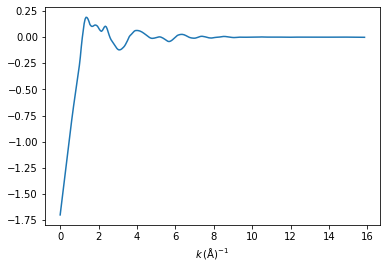

In [16]:
from larch.xafs import autobk
autobk(fe2o3, rbkg=0.85, kweight=2)

plt.plot(fe2o3.k, fe2o3.chi)
plt.xlabel(r'$k\, ({\rm\AA})^{-1}$')

but we usually want to plot $k$-weighted $\chi(k)$:

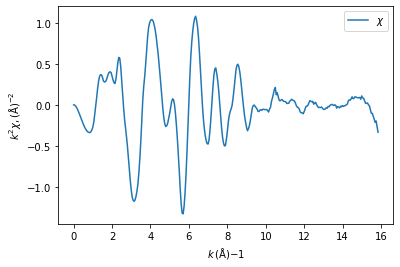

In [17]:
plt.plot(fe2o3.k, fe2o3.chi*fe2o3.k**2, label='$\chi$')
plt.xlabel(r'$k\, ({\rm\AA}){-1}$')
plt.ylabel(r'$k^2\chi, ({\rm\AA})^{-2}$')
plt.legend()

we'll keep plotting with in-line plots, but to avoid having to type out the full markup for the labels, we'll import them and use them: 

['chie', 'chikw', 'chir', 'chirim', 'chirlab', 'chirmag', 'chirpha', 'chirre', 'deconv', 'dmude', 'dnormde', 'e0color', 'energy', 'flat', 'k', 'mu', 'norm', 'r']


Text(0, 0.5, '$k^{2}\\chi(k) \\rm\\,(\\AA^{-2})$')

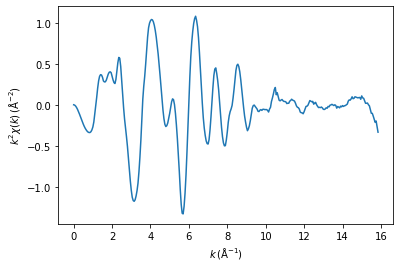

In [18]:
from larch.wxlib import plotlabels as plab
print(dir(plab))
plt.plot(fe2o3.k, fe2o3.chi*fe2o3.k**2)
plt.xlabel(plab.k)
plt.ylabel(plab.chikw.format(2))

we can also plot the background $\mu_0(E)$:

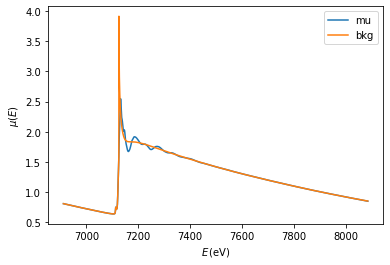

In [19]:
plt.plot(fe2o3.energy, fe2o3.mu, label='mu')
plt.plot(fe2o3.energy, fe2o3.bkg, label='bkg')
plt.xlabel(plab.energy)
plt.ylabel(plab.mu)
plt.legend()

and now we will do the Fourier transform from $\chi(k)$ to $\chi(R)$, using the `xftf()` (XAFS Fourier Transform Forward) function.  We'll do the Fourier transform on $k^2$ weighted $\chi(k)$ with a Kaiser-Bessel Window. 

In [20]:
from larch.xafs import xftf
xftf(fe2o3, kweight=2, kmin=2, kmax=13.0, dk=5, kwindow='Kaiser-Bessel')

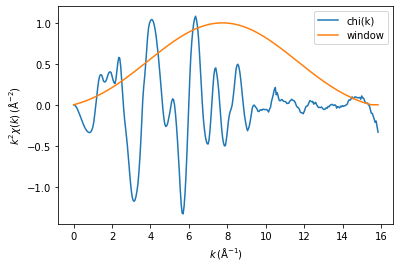

In [21]:
plt.plot(fe2o3.k, fe2o3.chi*fe2o3.k**2, label='chi(k)')
plt.plot(fe2o3.k, fe2o3.kwin, label='window')
plt.xlabel(plab.k)
plt.ylabel(plab.chikw.format(2))
plt.legend()

and we can show that data as $\chi(R)$

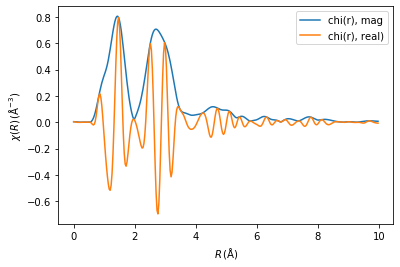

In [14]:
plt.plot(fe2o3.r, fe2o3.chir_mag, label='chi(r), mag')
plt.plot(fe2o3.r, fe2o3.chir_re, label='chi(r), real)')
plt.xlabel(plab.r)
plt.ylabel(plab.chir.format(3))
plt.legend()